*This notebook was created by Mykola Veremchuk (mykola.veremchuk@xfel.eu), Svitozar Serkez. Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). June 2019.*

## Tutorial N13. Converting synchrotron radiation `Screen` object to `RadiationField` object for viewing and propagation

`ocelot.optics.wave.RadiationField` is used for a lot of ocelot optics features (propagation, mirror reflection, 
diffraction etc.)

### Contents
1. [2D synchrotron radiation field](#2d)
    * [Generating 2D Screen](#gen_screen_2d)
    * [Converting 2D Screen to 2D RadiationField](#gen_dfl_2d)
    * [Plotting RadiationFiled](#plot_dfl_2d)
1. [3D synchrotron radiation field](#3d)
    * [Generating 3D Screen](#gen_screen_3d)
    * [Converting 3D Screen to 3D RadiationField](#gen_dfl_3d)
    * [Plotting RadiationFiled](#plot_dfl_3d)

<a id='2d'></a>
## 2D synchrotron radiation field

In [1]:
import numpy as np
import logging
import ocelot
from ocelot.cpbd.elements import Undulator
from ocelot.cpbd.magnetic_lattice import MagneticLattice
from ocelot.cpbd.beam import Beam
from ocelot.rad.screen import Screen
from ocelot.rad.radiation_py import calculate_radiation
from ocelot.optics.wave import dfl_waistscan, screen2dfl, RadiationField
from ocelot.gui.dfl_plot import plot_dfl, plot_dfl_waistscan
from ocelot import ocelog

ocelog.setLevel(logging.ERROR)

initializing ocelot...


In [2]:
# Activate interactive matplolib in notebook
import matplotlib
%matplotlib inline
# Setup figure white background 
matplotlib.rcParams["figure.facecolor"] = (1,1,1,1)
# Setup figure size
matplotlib.rcParams['figure.figsize'] = [10, 10]

<a id='gen_screen_2d'></a>
### Generating 2D Screen

Check out `9_synchrotron_radiation.ipynb` tutorial first

In [3]:
# generating 2D synchrotron radiation (it will take about 1-3 minute)
und = Undulator(Kx=0.43, nperiods=500, lperiod=0.007, eid="und")
lat = MagneticLattice(und)
beam = Beam()
beam.E = 2.5  # beam energy in [GeV]
beam.I = 0.1  # beam current in [A]
screen_2d = Screen()
screen_2d.z = 50.0  # distance from the begining of lattice to the screen
screen_2d.size_x = 0.0015  # half of screen size in [m] in horizontal plane
screen_2d.nx = 200
screen_2d.ny = 200
screen_2d.start_energy = 7762  # [eV], starting photon energy
screen_2d.end_energy = 7762  # [eV], ending photon energy
screen_2d.num_energy = 1  # number of energy points[eV]
screen_2d = calculate_radiation(lat, screen_2d, beam)

<a id='gen_dfl_2d'></a>
### Converting 2D Screen to 2D RadiationField

to convert SR from Screen to  RadiationField there is a function:

```dfl = screen2dfl(screen, polarization='x')```
* ```screen```: Screen object, electric field of which will be used to generate RadiationField
* ```polarization```:  polarization for conversion to RadiationField ($E_x$ or $E_y$)

In [4]:
dfl_2d = screen2dfl(screen_2d, polarization='x') 

<a id='plot_dfl_2d'></a>
### Plotting RadiationFiled
LOOK TUTORIAL ABOUT RadiationField AND ITS PLOTTING IN demos/optics/1-radiation_field.py

2D RadiationFied generated from Screen 

/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  

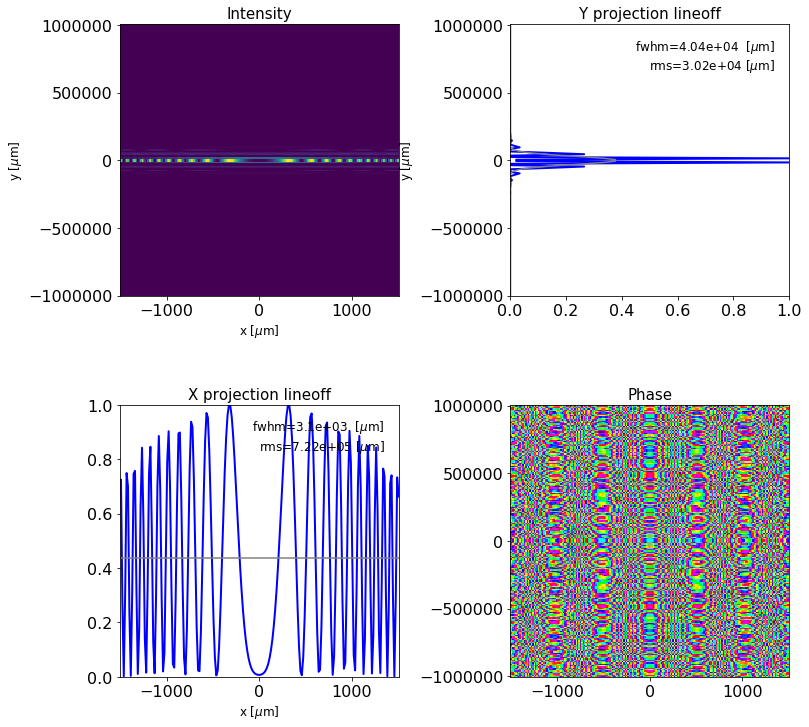

In [5]:
plot_dfl(dfl_2d, domains='fs', fig_name='dfl_2d generated from screen_2d') #plotting in space-frequency domain #fix

Scanning for waist position

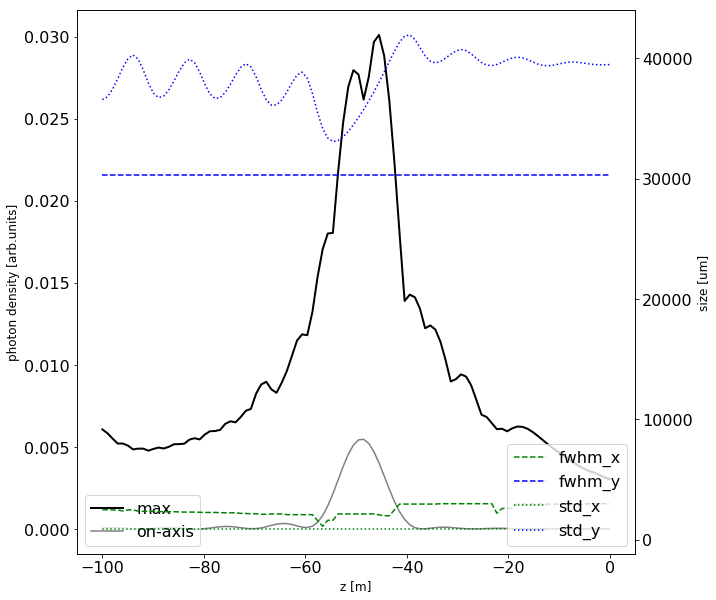

In [6]:
wfs = dfl_waistscan(dfl_2d, np.linspace(-100, 0, 100))
plot_dfl_waistscan(wfs, fig_name='waist scan of dfl_2d')

RadiationFied propageted to waist position 

(pay attention to size of RadiationField, it is changed by magnification `m` argument)

/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  

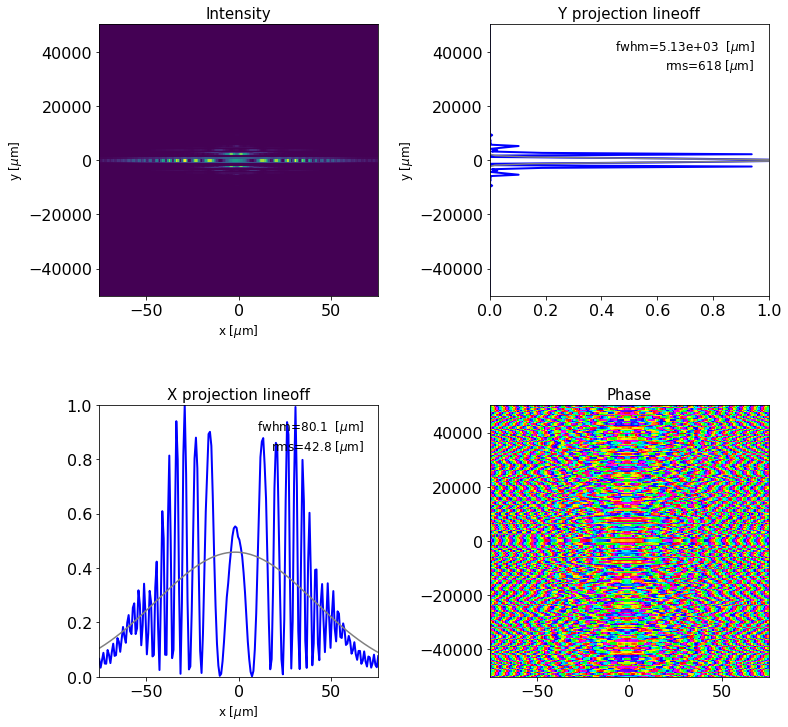

In [7]:
dfl_2d.prop_m(-48.25,   # z is the propagation distance in [m] 
              m=0.05)   # m is the output mesh size in terms of input mesh size (m = L_out/L_inp)
plot_dfl(dfl_2d, domains='fs', fig_name='dfl_2d at waist position')

<a id='gen_screen_3d'></a>
### Generating and converting 3D Screen

In [8]:
# generating 3D synchrotron radiation (it will take up to 5 minute)
# LOOK TUTORIAL ABOUT GENERATING SYNCHROTRON RADIATION IN demos/ipython_tutorials/9_synchrotron_radiation.ipynb
screen_3d = Screen()
screen_3d.z = 50.0  # distance from the begining of lattice to the screen
screen_3d.size_x = 0.0015  # half of screen size in [m] in horizontal plane
screen_3d.size_y = 0.0015  # half of screen size in [m] in vertical plane

screen_3d.ny = 75
screen_3d.nx = 75
screen_3d.start_energy = 7730  # [eV], starting photon energy
screen_3d.end_energy = 7795  # [eV], ending photon energy
screen_3d.num_energy = 20  # number of energy points[eV]
screen_3d = calculate_radiation(lat, screen_3d, beam)
dfl_3d = screen2dfl(screen_3d, polarization='x') 

SR 3D calculation


3D RadiationFied converted from Screen in space-frequency domain

/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  

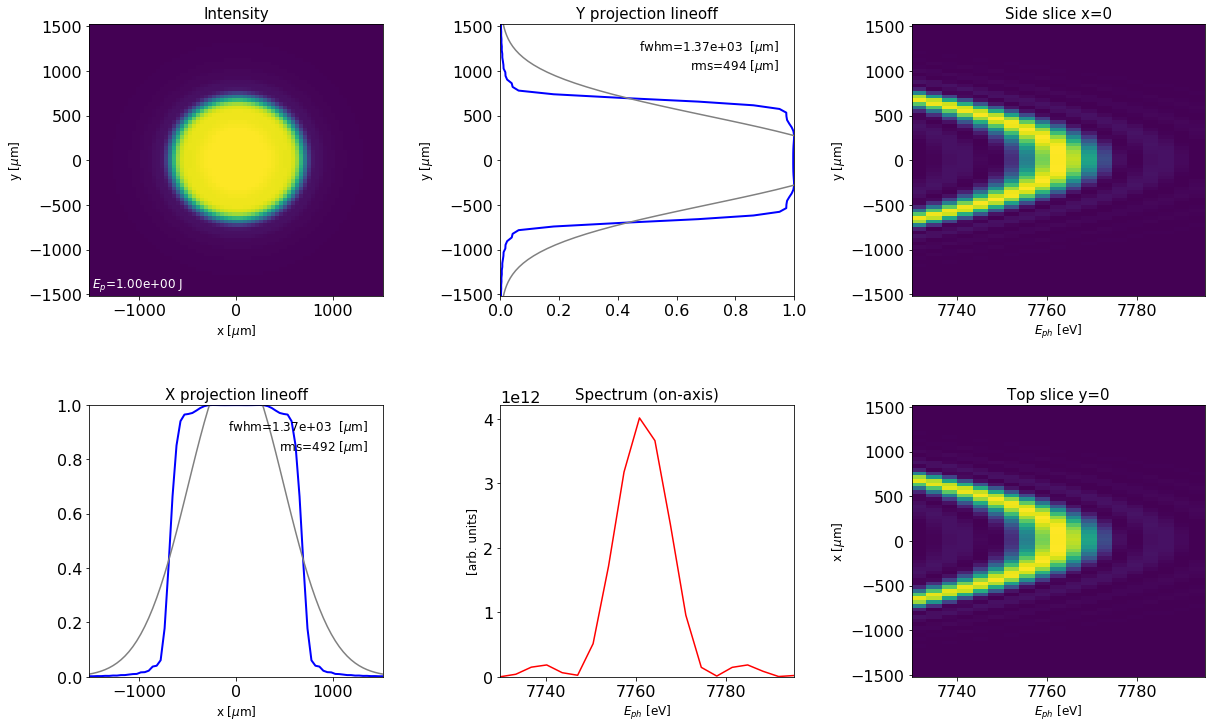

In [9]:
plot_dfl(dfl_3d, 
         domains='sf',
         fig_name='dfl_3d in space-frequency domain',
         slice_xy=True)    # bool type variable, if True, slices will be plotted; if False, projections will be plotted

Plotting in space-time domain

/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  

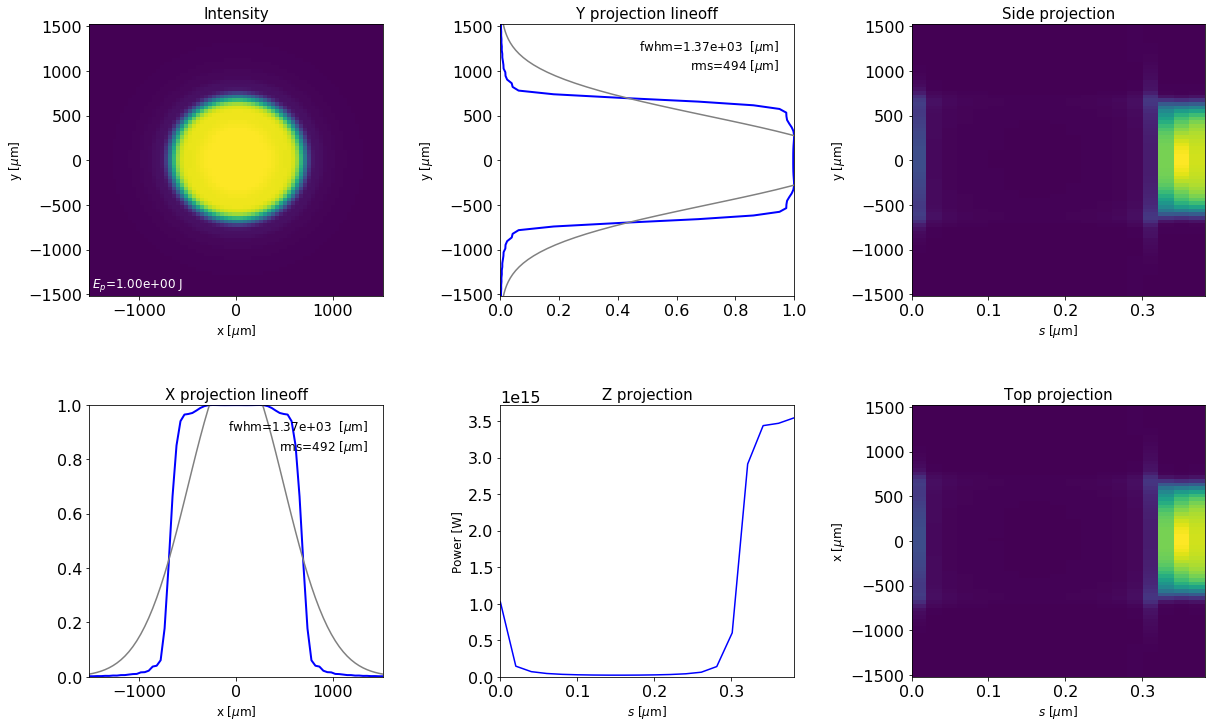

In [10]:
plot_dfl(dfl_3d,
         domains='st',
         fig_name='dfl_3d in space-time domain',
         slice_xy=False)    # bool type variable, if True, slices will be plotted; if False, projections will be plotted

Scanning for waist position

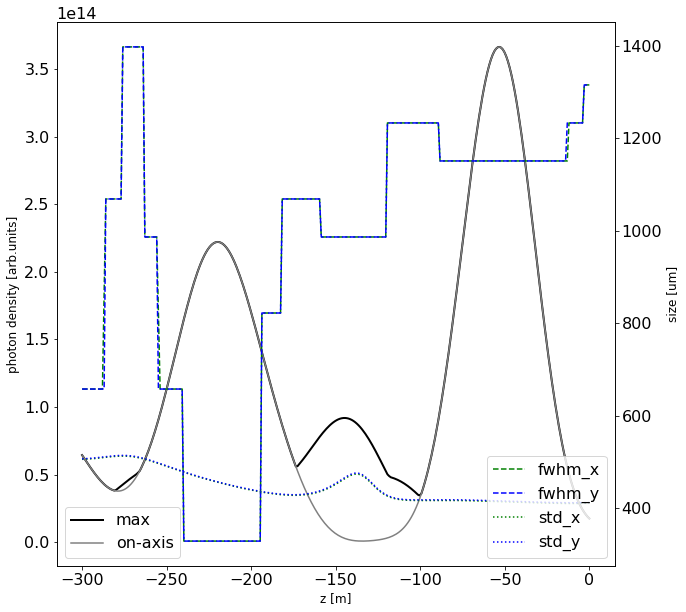

In [11]:
wfs = dfl_waistscan(dfl_3d, z_pos=np.linspace(-300, 0, 300))
plot_dfl_waistscan(wfs, fig_name='waist scan of dfl_3d')

/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Users/tomins/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  

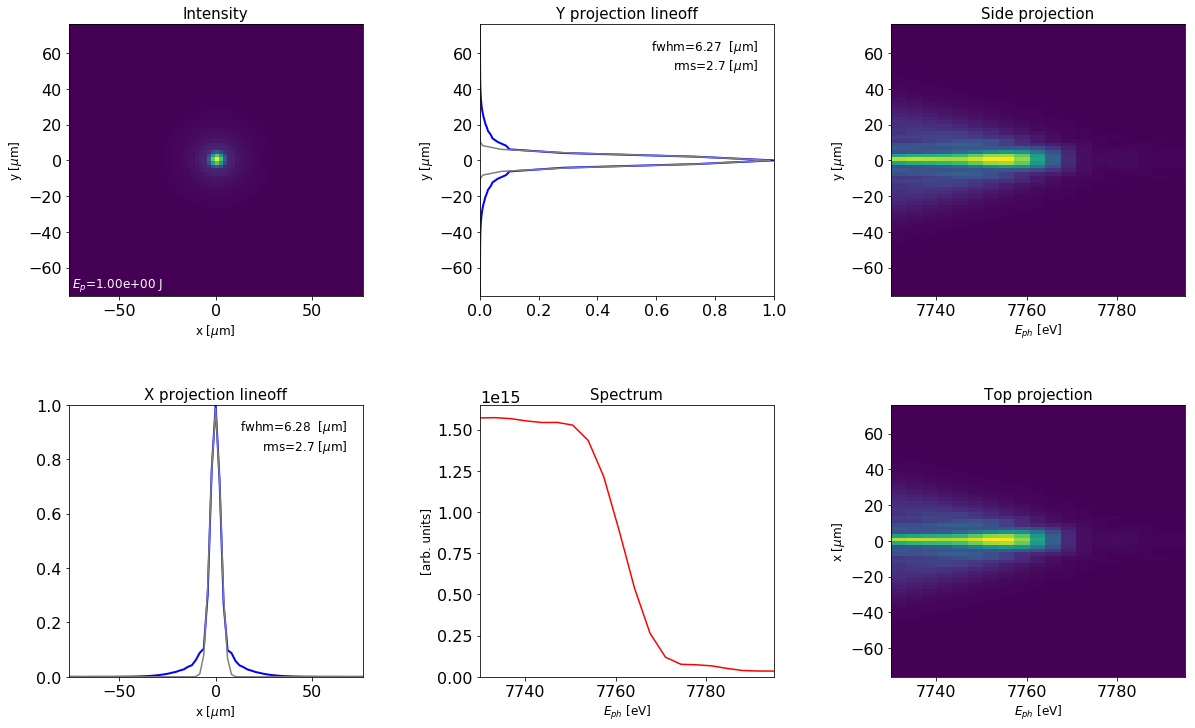

In [12]:
dfl_3d.prop_m(-48.25, m=0.05)
plot_dfl(dfl_3d,
         domains='fs',
         fig_name='dfl_3d at waist position in frequency-space domains',
         slice_xy=False)     # bool type variable, if True, slices will be plotted; if False, projections will be plotted